# Examen Redes Neuronales

Cargamos la base de datos de California que se encuentra en sklearn.

In [134]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()

# Separamos los datos del objetivo a averiguar
X, y = pd.DataFrame(california.data), california.target

## Visualización de los datos

Creación del dataframe y observación del mismo.

In [135]:
import numpy as np
import pandas as pd

# Creamos el dataframe
df = pd.DataFrame(data=np.c_[X, y], columns=california.feature_names + ['target'])
df.target = df.target.astype(int) # Establecemos el objetivo como tipo entero

# Observamos el dataframe para saber si hay algún valor anómalo
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3


Procedemos a observar la correlación entre sus características.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.673564
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.103925
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.148245
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.043793
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.022397
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.022087
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.142142
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.040733
target,0.673564,0.103925,0.148245,-0.043793,-0.022397,-0.022087,-0.142142,-0.040733,1.000000


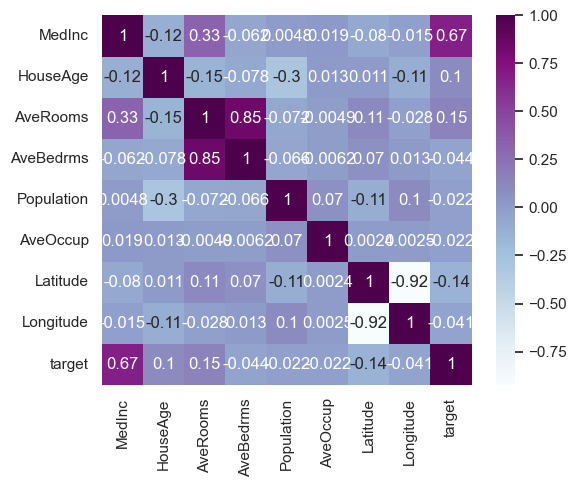

In [136]:
import seaborn as sns

sns.set()
sns.heatmap(df.corr(), square=True, annot=True, cmap='BuPu')
df.corr()

## Creación del modelo

Lo primero que hacemos es el preprocesamiento de los datos.

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# Crear preprocesador, en el cual escalaremos los datos usando StandarScaler
preprocessor = make_column_transformer(
    (StandardScaler(), X.columns),
)

Dividimos el conjunto de datos en entrenamiento y test (validación).

In [138]:
from sklearn.model_selection import train_test_split

# Le pongo la semilla '42' para que siempre me lo haga del mismo modo
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

Preprocesamos los datos.

In [139]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [140]:
# Mostrar la forma de los datos
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [8]


Ahora creamos el early stopping

In [141]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear el callback de early stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # Cualquier cambio menor a 0.001 se considera como no mejora
    patience=20, # El modelo se detiene si no mejora en 20 epochs
    restore_best_weights=True, # Restaurar los mejores pesos
)

Creamos las capas de la red neuronal

In [142]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1),
])

Compilamos el modelo

In [143]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Ajustamos el modelo

Epoch 1/200
61/61 [==============================] - 3s 34ms/step - loss: 0.6459 - val_loss: 0.4787
Epoch 2/200
61/61 [==============================] - 2s 31ms/step - loss: 0.4680 - val_loss: 0.4296
Epoch 3/200
61/61 [==============================] - 2s 32ms/step - loss: 0.4495 - val_loss: 0.4162
Epoch 4/200
61/61 [==============================] - 2s 32ms/step - loss: 0.4353 - val_loss: 0.4014
Epoch 5/200
61/61 [==============================] - 2s 31ms/step - loss: 0.4280 - val_loss: 0.4037
Epoch 6/200
61/61 [==============================] - 2s 31ms/step - loss: 0.4150 - val_loss: 0.3855
Epoch 7/200
61/61 [==============================] - 2s 31ms/step - loss: 0.4096 - val_loss: 0.4108
Epoch 8/200
61/61 [==============================] - 2s 31ms/step - loss: 0.3996 - val_loss: 0.3800
Epoch 9/200
61/61 [==============================] - 2s 31ms/step - loss: 0.3981 - val_loss: 0.3703
Epoch 10/200
61/61 [==============================] - 2s 31ms/step - loss: 0.3877 - val_loss: 0.3609

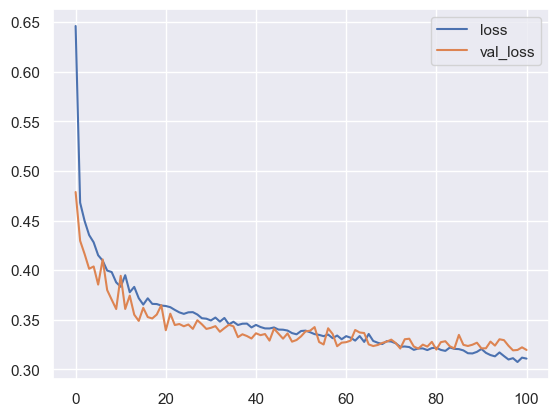

In [144]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1,
)

# Mostramos el historial del entrenamiento
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

## Exportación del modelo y el preprocesador

In [145]:
import pickle as pkl
# Exportar modelo y preprocesador en un archivo pkl
with open('california_model.pkl', 'wb') as f:
    pkl.dump(model, f)
with open('california_preprocessor.pkl', 'wb') as f:
    pkl.dump(preprocessor, f)